# Overview Results


In [1]:
from scripts.viz_utils import *
from scripts.utils import get_question_statement

data = pd.read_csv('../data/data_scales.csv', index_col='ResponseId')

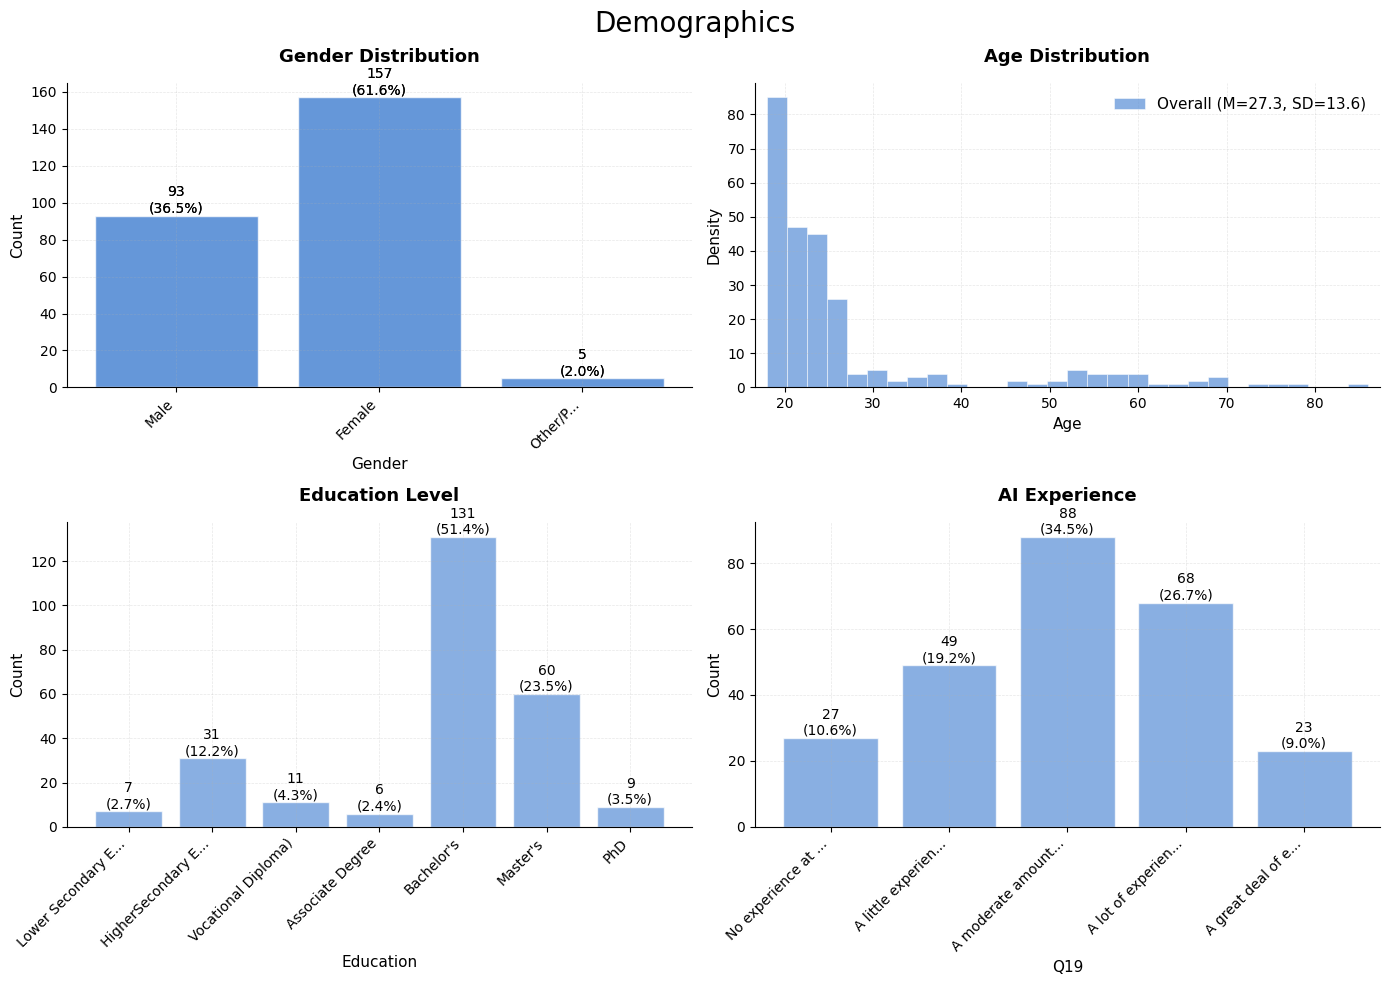

In [2]:
# Demographics
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))
plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)

plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)
plot_continuous_distribution(data, 'age', title='Age Distribution', ax=axes[1])
plot_categorical_bar(data, 'education', title='Education Level', ax=axes[2])
plot_categorical_bar(data, 'Q19', title='AI Experience', ax=axes[3])

fig.suptitle("Demographics", fontsize=20)

plt.tight_layout()
plt.show()

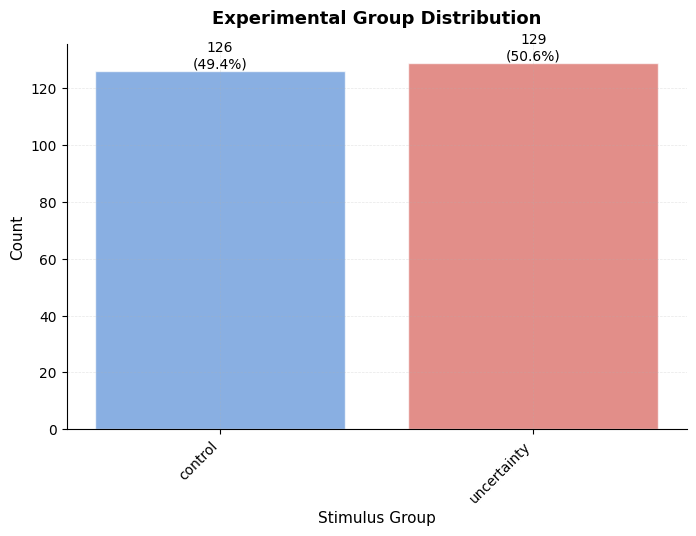

In [3]:
# distribution over experimental groups
fig, ax = plt.subplots(figsize=(8, 5))

# Get value counts for stimulus_group
counts = data['stimulus_group'].value_counts().sort_index()

# Get readable labels
from scripts.viz_utils import get_readable_labels
x_labels = get_readable_labels('stimulus_group', counts.index.tolist(), trunc=20)

# Create manual color mapping using the same colors as the grouped plots
colors = ['#578ED6', '#D65F57']  # Blue for control (0), Pink for uncertainty (1)

# Plot bars with custom colors
bars = ax.bar(range(len(counts)), counts.values, color=colors,
             alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add percentage labels
for i, (bar, count) in enumerate(zip(bars, counts.values)):
    height = bar.get_height()
    percentage = count / counts.sum() * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{count:.0f}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontsize=10)

# Apply styling
from scripts.viz_utils import apply_consistent_style
apply_consistent_style(ax, title='Experimental Group Distribution',
                      xlabel='Stimulus Group', ylabel='Count')

plt.show()

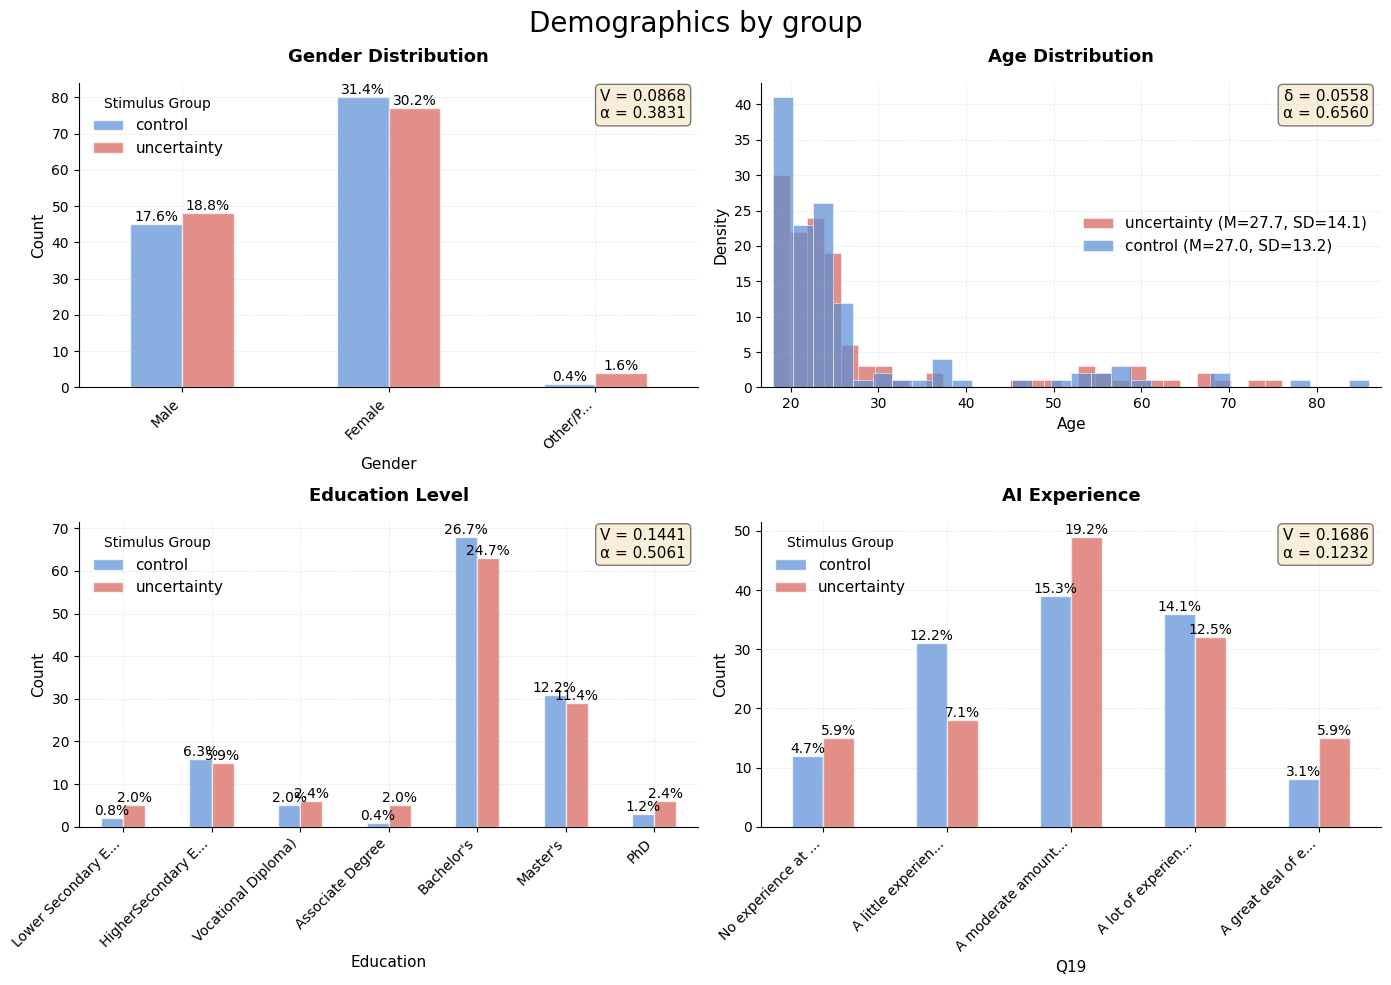

In [4]:
# Demographics per group
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))

plot_categorical_bar(data, 'gender', group_by='stimulus_group', title='Gender Distribution', ax=axes[0], trunc=10, show_absolute=False)
plot_continuous_distribution(data, 'age', group_by='stimulus_group', title='Age Distribution', ax=axes[1])
plot_categorical_bar(data, 'education', group_by='stimulus_group', title='Education Level', ax=axes[2], show_absolute=False)
plot_categorical_bar(data, 'Q19', group_by='stimulus_group', title='AI Experience', ax=axes[3], show_absolute=False)

fig.suptitle("Demographics by group", fontsize=20)

plt.tight_layout()
plt.show()

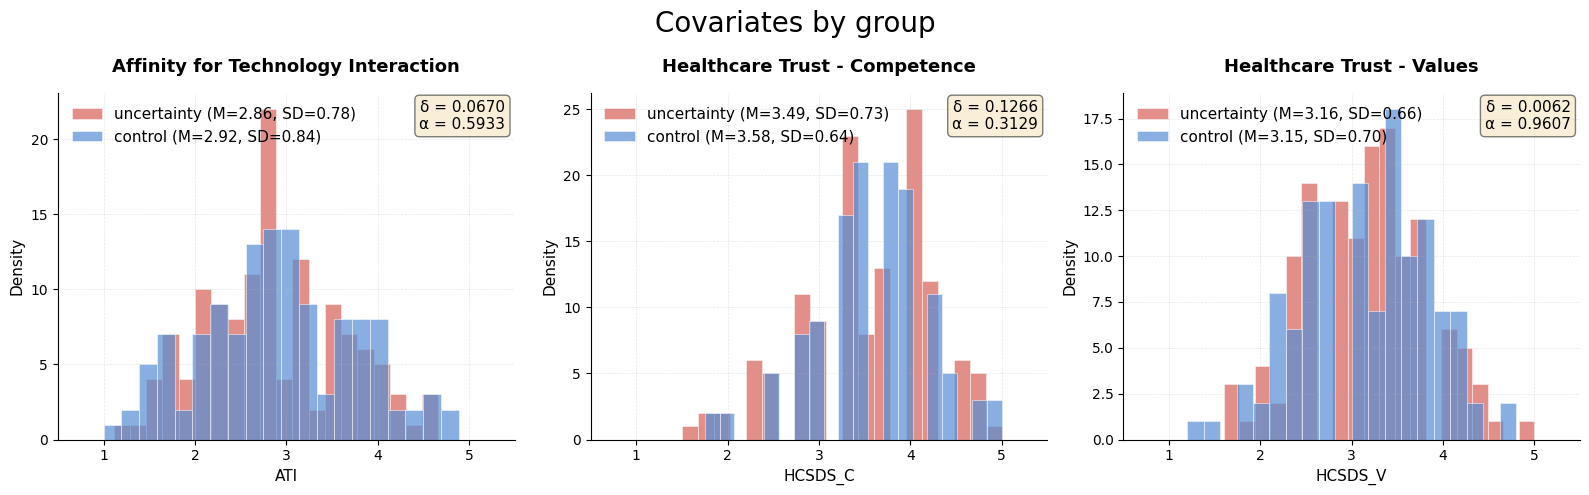

In [5]:
# Covariates
fig, axes = create_figure_grid(3, ncols=3, figsize=(16, 5))

plot_likert_distribution(data, 'ati', title='Affinity for Technology Interaction',
                        group_by='stimulus_group', ax=axes[0])

plot_likert_distribution(data, 'hcsds_c', title='Healthcare Trust - Competence',
                        group_by='stimulus_group', ax=axes[1])

plot_likert_distribution(data, 'hcsds_v', title='Healthcare Trust - Values',
                        group_by='stimulus_group', ax=axes[2])

fig.suptitle("Covariates by group", fontsize=20)

plt.tight_layout()
plt.show()

In [6]:
print(get_question_statement('manip_check1_1'))

The MDSS makes medical decisions independently


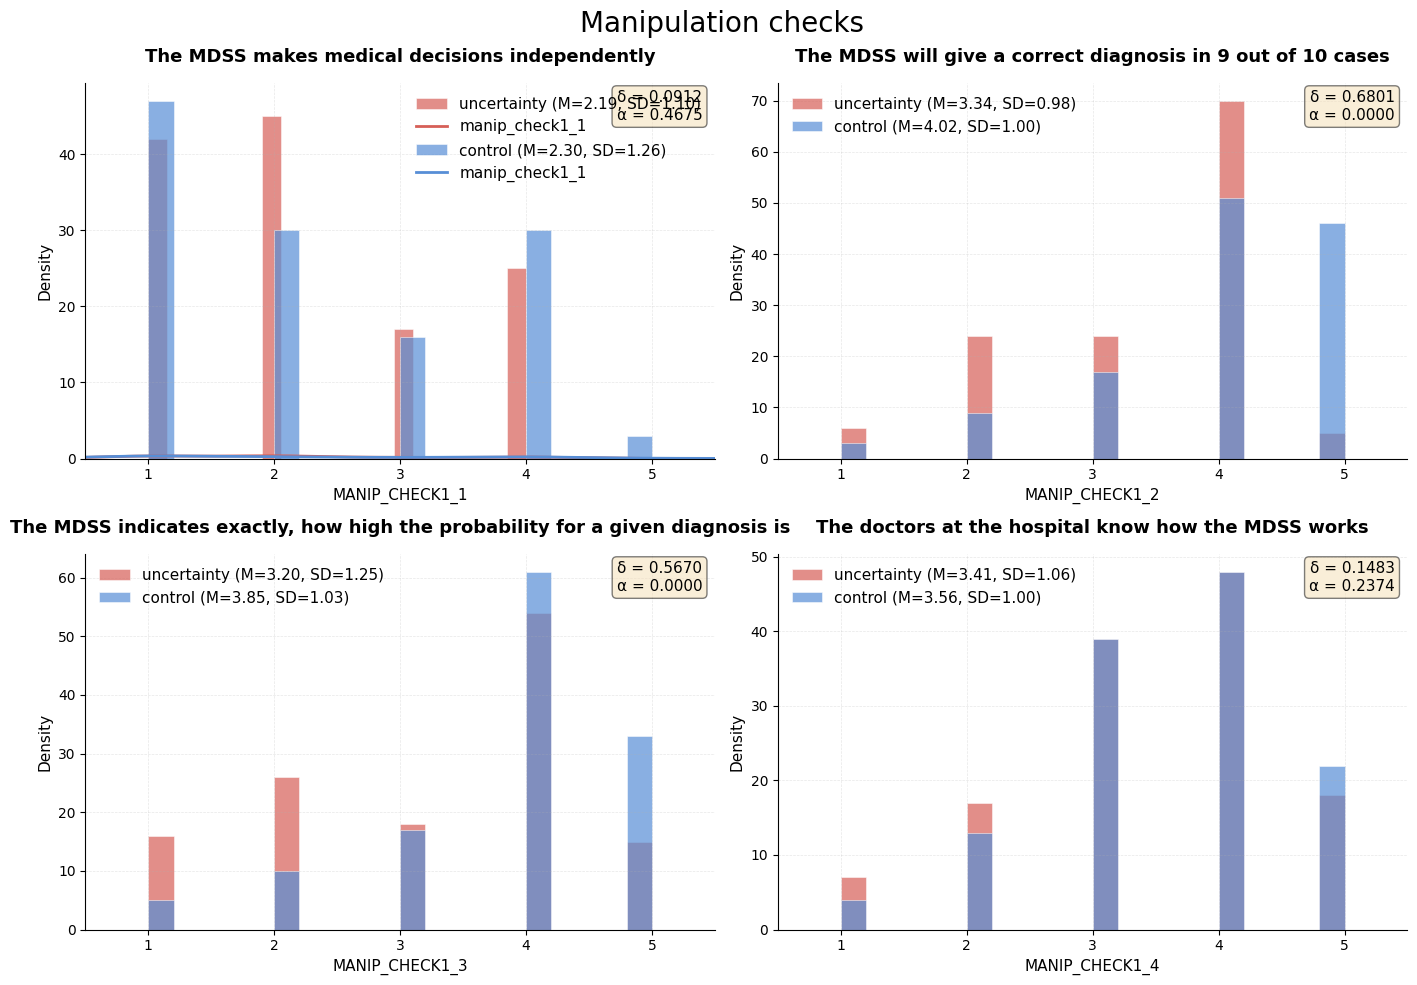

In [8]:
# Manipulation check
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))

plot_likert_distribution(data, 'manip_check1_1', title=get_question_statement('manip_check1_1'), group_by='stimulus_group', ax=axes[0])
plot_likert_distribution(data, 'manip_check1_2', title=get_question_statement('manip_check1_2'), group_by='stimulus_group', ax=axes[1])
plot_likert_distribution(data, 'manip_check1_3', title=get_question_statement('manip_check1_3'), group_by='stimulus_group', ax=axes[2])
plot_likert_distribution(data, 'manip_check1_4', title=get_question_statement('manip_check1_4'), group_by='stimulus_group', ax=axes[3])

fig.suptitle("Manipulation checks", fontsize=20)

plt.tight_layout()
plt.show()